<a href="https://colab.research.google.com/github/CodesByVishal/House-Price-Prediction-Regression-/blob/main/House_Price_Prediction_Advanced_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_1 = pd.read_csv("/content/drive/MyDrive/House Price Prediction Advanced Regression/train.csv")
df_2 = pd.read_csv("/content/drive/MyDrive/House Price Prediction Advanced Regression/test.csv")
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1, df_2], axis = 0)
df = df.set_index('Id')

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_null  = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [6]:
df_null.sample(5)

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1903,RL,NaN,NaN,AllPub,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,...,1940.0,Unf,2.0,400.0,TA,TA,NaN,NaN,NaN,WD
495,RM,50.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Fa,TA,...,1938.0,Unf,1.0,273.0,TA,TA,NaN,NaN,NaN,WD
262,RL,69.0,NaN,AllPub,CemntBd,CmentBd,Stone,270.0,Ex,TA,...,2007.0,Fin,3.0,868.0,TA,TA,NaN,NaN,NaN,New
2268,RL,81.0,NaN,AllPub,CemntBd,CmentBd,BrkFace,250.0,Ex,TA,...,2007.0,Fin,3.0,724.0,TA,TA,NaN,NaN,NaN,New
192,RL,NaN,NaN,AllPub,HdBoard,HdBoard,BrkFace,138.0,TA,TA,...,1972.0,Fin,2.0,484.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

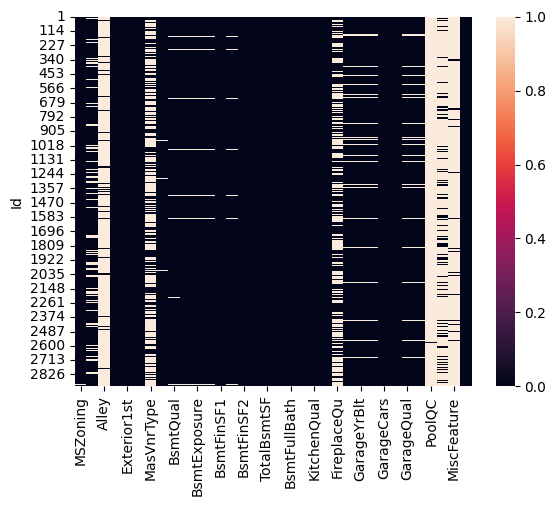

In [7]:
sns.heatmap(df_null.isnull())

In [8]:
df_objects =  df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [9]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

df_objects = df_objects.fillna('null')

df_objects_encoded = pd.get_dummies(df_objects)

In [10]:
df_objects['Utilities'].value_counts()

,count
Utilities,
AllPub,2916
null,2
NoSeWa,1


In [11]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [12]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [13]:
new_df = pd.concat([df, df_objects_encoded], axis = 1)

In [14]:
len(new_df.columns)

304

In [15]:
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [16]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)

new_df.isna().sum()[new_df.isna().sum() > 0]

,0
LotFrontage,486
MasVnrArea,23
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFullBath,2
BsmtHalfBath,2
GarageYrBlt,159
GarageCars,1


In [17]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0]


,0


In [18]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testing_data = testing_data.drop(columns='SalePrice')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [20]:
X = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
Y_train = np.reshape(y_train,(-1, 1))
Y_test = np.reshape(y_test,(-1, 1))
x_train.shape, y_train.shape

((1168, 266), (1168,))

In [21]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)


In [22]:
MSE = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_predict)
R2_Score = r2_score(y_test,y_predict)

In [23]:
print("MSE  : ",round(MSE,3))
print("RMSE : ",round(RMSE,3))
print("MAE  : ",round(MAE,3))
print("R2   : ",round(R2_Score,3))

MSE  :  816034162.58
RMSE :  28566.312
MAE  :  19031.783
R2   :  0.896


In [24]:
def get_metrics(y_test, y_predict, model_name):
    MSE = mean_squared_error(y_test,y_predict)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test,y_predict)
    R2_Score = r2_score(y_test,y_predict)

    print(f"Model Name : {model_name},\n MSE : {round(MSE,3)},\n RMSE :{round(RMSE,3)},\n MAE :{round(MAE,3)},\n R2 Score : {round(R2_Score,3)}\n")

In [25]:
get_metrics(y_test, y_predict, "Liner Regression")

Model Name : Liner Regression,
 MSE : 816034162.58,
 RMSE :28566.312,
 MAE :19031.783,
 R2 Score : 0.896



In [26]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [27]:
rig = Ridge().fit(x_train, y_train)
y_pred_rig = rig.predict(x_test)

lar = Lasso().fit(x_train, y_train)
y_pred_lar = lar.predict(x_test)

poly = PolynomialFeatures(1)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

poly_r = LinearRegression().fit(x_train_poly, y_train)
y_pred_poly = poly_r.predict(x_test_poly)

svr = SVR().fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

knnr = KNeighborsRegressor().fit(x_train, y_train)
y_pred_knn = knnr.predict(x_test)

dtr = DecisionTreeRegressor().fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)

rfr = RandomForestRegressor(n_estimators=1000).fit(x_train, y_train) #use bagging (ensmble)
y_pred_rfr = rfr.predict(x_test)

xgbr = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42).fit(x_train, y_train) #use boosting(ensmble)
y_pred_rxgbr = xgbr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+11, tolerance: 6.912e+08
  model = cd_fast.enet_coordinate_descent(


In [28]:
get_metrics(y_test, y_pred_rig, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "PolynomialFeatures")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knn, "KNeighborsRegressor")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_rxgbr, "XGBRegressor")

Model Name : Ridge,
 MSE : 875265103.159,
 RMSE :29584.88,
 MAE :19614.986,
 R2 Score : 0.888

Model Name : Lasso,
 MSE : 791171642.698,
 RMSE :28127.774,
 MAE :18787.354,
 R2 Score : 0.899

Model Name : PolynomialFeatures,
 MSE : 816034162.581,
 RMSE :28566.312,
 MAE :19031.783,
 R2 Score : 0.896

Model Name : SVR,
 MSE : 8303577721.573,
 RMSE :91123.969,
 MAE :60815.982,
 R2 Score : -0.06

Model Name : KNeighborsRegressor,
 MSE : 2912047674.399,
 RMSE :53963.392,
 MAE :31024.34,
 R2 Score : 0.628

Model Name : DecisionTreeRegressor,
 MSE : 1698203241.842,
 RMSE :41209.262,
 MAE :25424.24,
 R2 Score : 0.783

Model Name : RandomForestRegressor,
 MSE : 823653227.372,
 RMSE :28699.359,
 MAE :17815.683,
 R2 Score : 0.895

Model Name : XGBRegressor,
 MSE : 691344328.493,
 RMSE :26293.427,
 MAE :15572.023,
 R2 Score : 0.912



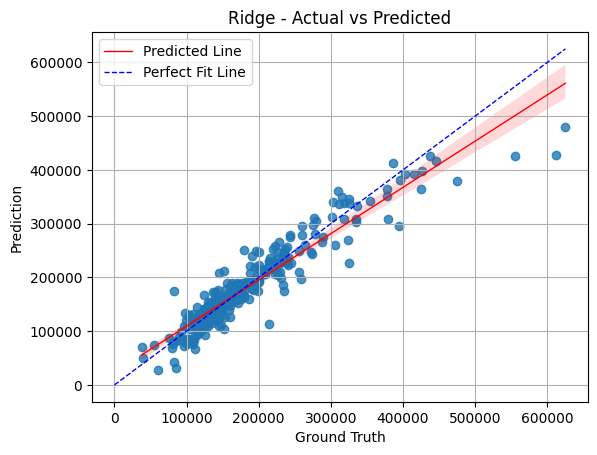

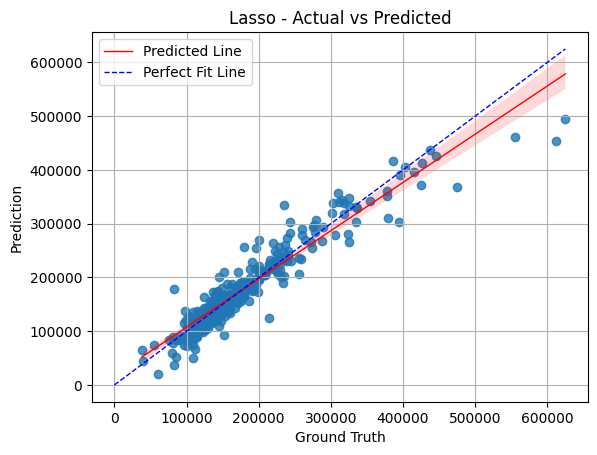

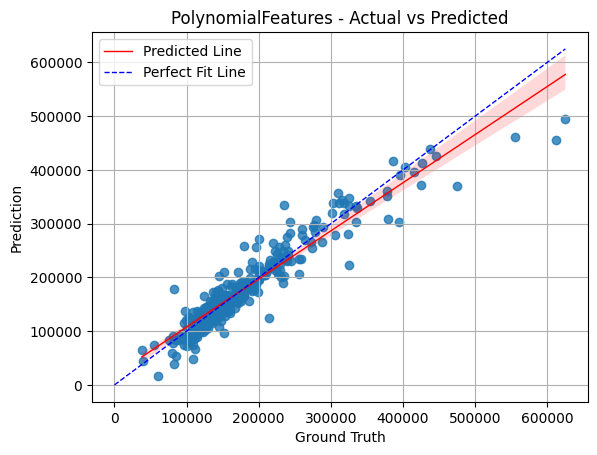

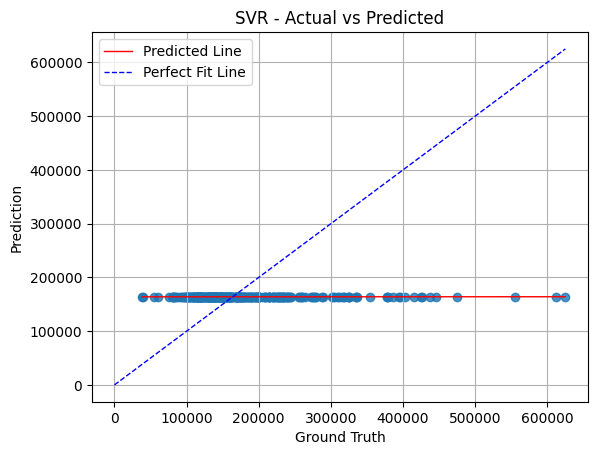

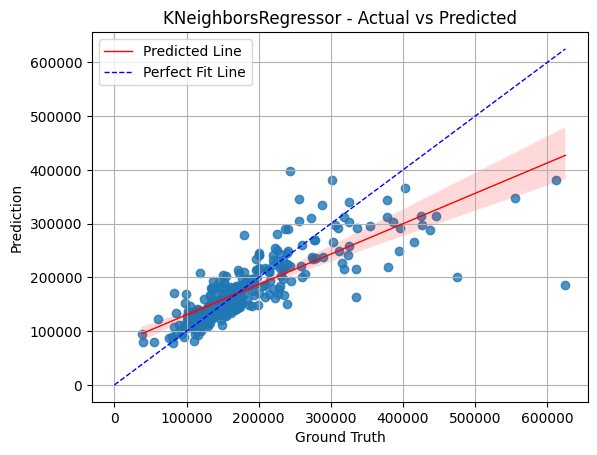

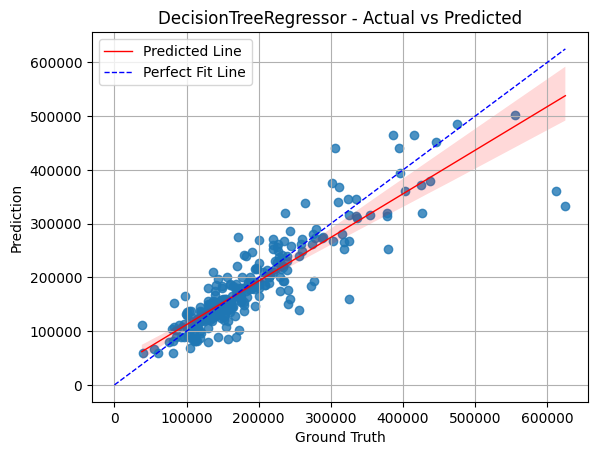

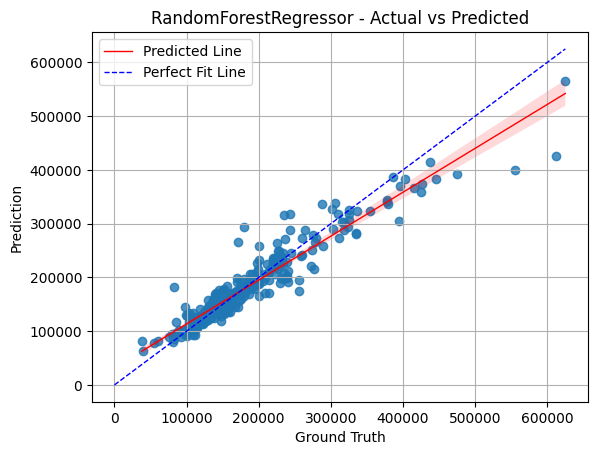

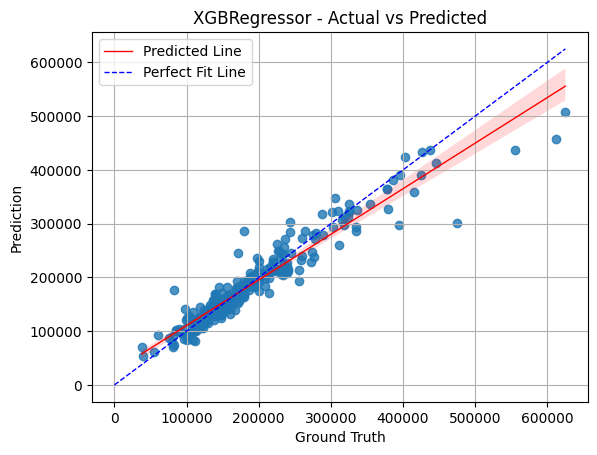

In [29]:
def visualize_model(y_test, y_predict, model_name):

    # Create a Seaborn regplot
    sns.regplot(x=y_test, y=y_predict, line_kws={"color":"red","linewidth":1, "label": "Predicted Line"})

    # Plotting the perfect fit line (slope = 1)
    max_val = max(np.max(y_test), np.max(y_predict))
    plt.plot([0, max_val], [0, max_val], color='blue', linestyle='--', linewidth=1, label='Perfect Fit Line')

    plt.title(f"{model_name} - Actual vs Predicted")
    plt.xlabel('Ground Truth')
    plt.ylabel('Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()



models = [
    (y_pred_rig, "Ridge"),
    (y_pred_lar, "Lasso"),
    (y_pred_poly, "PolynomialFeatures"),
    (y_pred_svr, "SVR"),
    (y_pred_knn, "KNeighborsRegressor"),
    (y_pred_dtr, "DecisionTreeRegressor"),
    (y_pred_rfr, "RandomForestRegressor"),
    (y_pred_rxgbr, "XGBRegressor")
]

for y_pred, model_name in models:
    visualize_model(y_test, y_pred, model_name)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
import time
start_time = time.time()

params = {
    'n_estimators': [100, 500, 1000,1500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.4, 1.0, 0.1)
}

xgbr = XGBRegressor(seed=20)
rscv = RandomizedSearchCV(estimator=xgbr, param_distributions=params, scoring='neg_mean_squared_error', n_iter=25, cv=5, verbose=1, random_state=20)


rscv.fit(x_train, y_train)

y_pred_xgb_random = rscv.predict(x_test)

print("Time taken:", time.time() - start_time)

get_metrics(y_test, y_pred_xgb_random, "XGB Regressor With Best Parameters")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Time taken: 469.32800674438477
Model Name : XGB Regressor With Best Parameters,
 MSE : 727806008.394,
 RMSE :26977.88,
 MAE :16096.852,
 R2 Score : 0.907



In [31]:
rscv.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 2,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.4}

In [32]:
rscv = XGBRegressor(n_estimators = 500,
               subsample =0.799999999999999999,
              min_child_weight = 1,
               max_depth =2,
               learning_rate = 0.2,
               gamma =0.2,
               colsample_bytree = 0.7999999999999999,
               colsample_bylevel = 0.4
)

rscv.fit(x_train,y_train)
y_pred_rscv =rscv.predict(x_test)

get_metrics(y_test, y_pred_rscv,"XGBRegressor With Best Parameters" )

Model Name : XGBRegressor With Best Parameters,
 MSE : 676026800.885,
 RMSE :26000.515,
 MAE :15933.833,
 R2 Score : 0.914

